In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Maternal Health Risk Data Set.csv")
df.head(5)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [4]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [5]:
df['RiskLevel_enc']= df['RiskLevel'].astype('category').cat.codes
df.head(5)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,RiskLevel_enc
0,25,130,80,15.0,98.0,86,high risk,0
1,35,140,90,13.0,98.0,70,high risk,0
2,29,90,70,8.0,100.0,80,high risk,0
3,30,140,85,7.0,98.0,70,high risk,0
4,35,120,60,6.1,98.0,76,low risk,1


In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

Age              0
SystolicBP       0
DiastolicBP      0
BS               0
BodyTemp         0
HeartRate        0
RiskLevel        0
RiskLevel_enc    0
dtype: int64

([<matplotlib.patches.Wedge at 0x161c5220c40>,
 [Text(0.7319824025943927, 0.8210979005527541, 'High Risk'),
  Text(-1.0784462180209045, 0.2166881511213932, 'Low Risk'),
  Text(0.5558921545614542, -0.9492017238169262, 'Mid Risk')],
 [Text(0.3992631286878505, 0.44787158211968403, '27%'),
  Text(-0.5882433916477661, 0.11819353697530535, '40%'),
  Text(0.30321390248806596, -0.5177463948092325, '33%')])

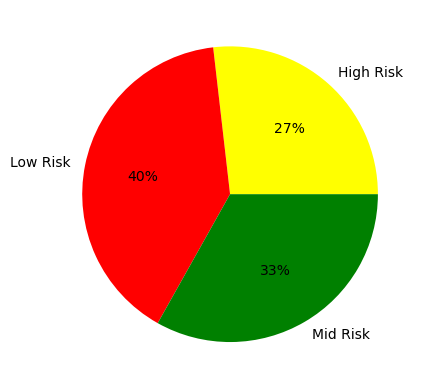

In [8]:
results=df['RiskLevel_enc'].value_counts()
values=[results[0],results[1],results[2]]
labels=['High Risk','Low Risk', 'Mid Risk']
colors = ['Yellow', 'Red','Green']
fig,ax=plt.subplots()
ax.pie(values,labels=labels, colors=colors,autopct='%.0f%%')

<AxesSubplot:xlabel='RiskLevel_enc'>

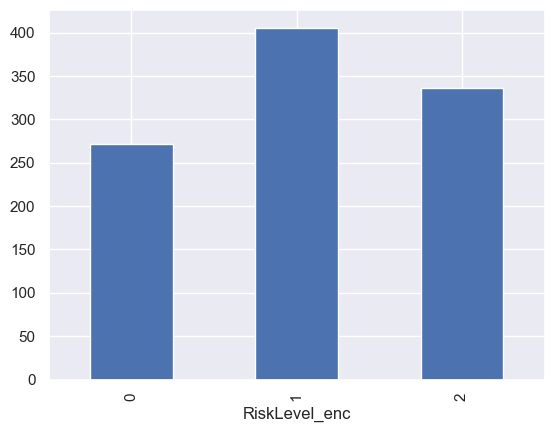

In [76]:
df.groupby('RiskLevel_enc')['RiskLevel_enc'].count().plot.bar()

In [11]:
df.groupby(["Age","RiskLevel"])["RiskLevel"].value_counts()

Age  RiskLevel  RiskLevel
10   low risk   low risk      2
     mid risk   mid risk      2
12   high risk  high risk     7
     low risk   low risk     15
     mid risk   mid risk     13
                             ..
63   high risk  high risk     2
65   high risk  high risk     1
     low risk   low risk      2
66   low risk   low risk      1
70   low risk   low risk      1
Name: RiskLevel, Length: 105, dtype: int64

In [13]:
df[df['RiskLevel_enc']==0]['Age'].count()

272

In [16]:
df[df['RiskLevel_enc']==1]['Age'].count()

406

In [17]:
df[df['RiskLevel_enc']==2]['Age'].count()

336

In [28]:
import seaborn as sns
sns.set(style='darkgrid')

In [31]:
df.groupby(["Age","SystolicBP"])["SystolicBP"].value_counts()

Age  SystolicBP  SystolicBP
10   70          70             1
     85          85             1
     100         100            2
12   90          90            13
     95          95            11
                               ..
65   90          90             1
     120         120            1
     130         130            1
66   85          85             1
70   85          85             1
Name: SystolicBP, Length: 136, dtype: int64

C:\Users\alokd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

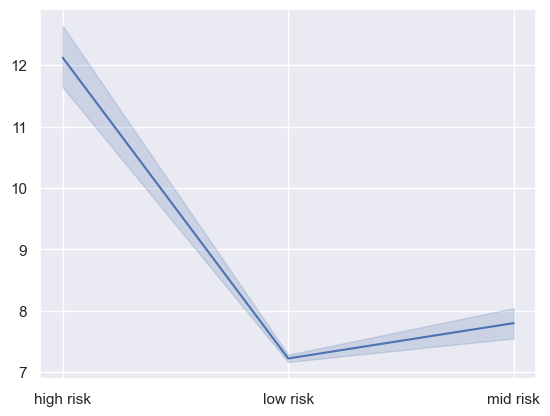

In [55]:
sns.lineplot(df['RiskLevel'].to_list(),df['BS'].to_list())

C:\Users\alokd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

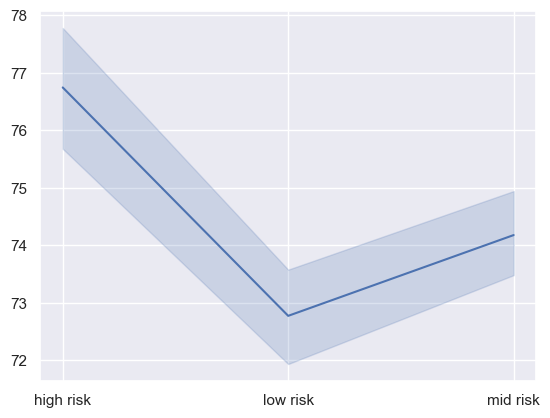

In [53]:
sns.lineplot(df['RiskLevel'].to_list(),df['HeartRate'].to_list())

C:\Users\alokd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

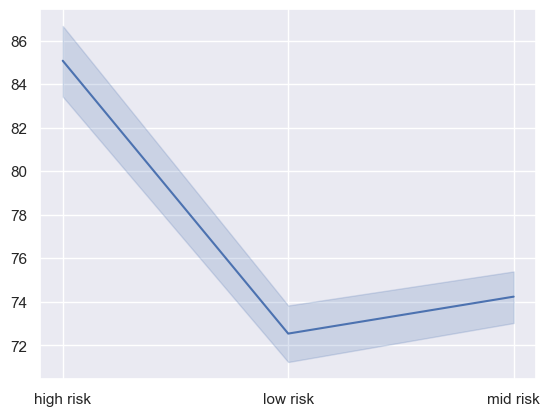

In [57]:
sns.lineplot(df['RiskLevel'].to_list(),df['DiastolicBP'].to_list())

C:\Users\alokd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

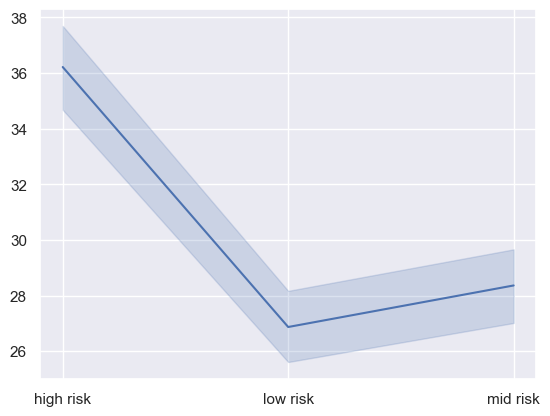

In [58]:
sns.lineplot(df['RiskLevel'].to_list(),df['Age'].to_list())

In [85]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel', 'RiskLevel_enc'],
      dtype='object')

In [86]:
num_column=['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

In [87]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
X=df[num_column].to_numpy()
Y = df['RiskLevel_enc'].to_numpy()

In [89]:
fs = SelectKBest(k=5, score_func = f_classif)
X_selected = fs.fit_transform(X,Y)

In [90]:
fs.get_support(True)

array([0, 1, 2, 3, 5], dtype=int64)

In [91]:
num_column_imp=['Age', 'SystolicBP', 'DiastolicBP', 'BS','HeartRate']

In [92]:
X=df[num_column_imp].to_numpy()
Y=df['RiskLevel_enc'].to_numpy()

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
scale=StandardScaler()
X_scaled=scale.fit_transform(X)

In [95]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,Y, test_size=0.3,shuffle =True)

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [98]:
y_pred = clf.predict(X_test)

In [99]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [100]:
print(f'Accuracy of the classifier is {accuracy_score(y_test,y_pred)*100}')

Accuracy of the classifier is 82.95081967213115


In [101]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 64,   2,   4],
       [  4, 100,  14],
       [  6,  22,  89]], dtype=int64)

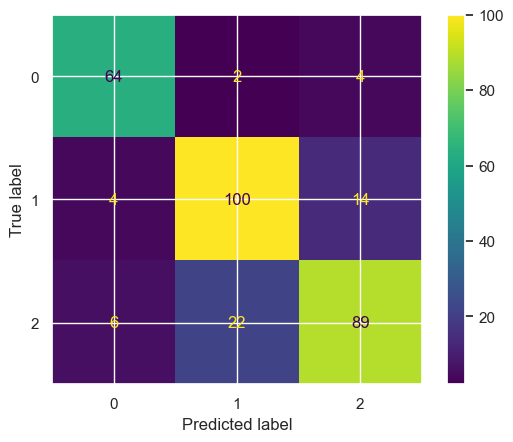

In [102]:
ConfusionMatrixDisplay(cm,display_labels=[0,1,2]).plot()

In [103]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test,y_pred)

(array([0.86486486, 0.80645161, 0.8317757 ]),
 array([0.91428571, 0.84745763, 0.76068376]),
 array([0.88888889, 0.82644628, 0.79464286]),
 array([ 70, 118, 117], dtype=int64))

In [80]:
from sklearn.model_selection import GridSearchCV

In [82]:
rfc = RandomForestClassifier(random_state=42)

In [104]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [105]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [106]:
print(CV_rfc.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}


In [111]:
clf3 = RandomForestClassifier(criterion= 'gini', max_depth= 8, max_features= 'log2', n_estimators= 500)
clf3.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, max_features='log2', n_estimators=500)

In [112]:
y2_pred = clf3.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

82.95081967213115

In [113]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test,y2_pred)

(array([0.89552239, 0.73913043, 0.84      ]),
 array([0.85714286, 0.86440678, 0.71794872]),
 array([0.87591241, 0.796875  , 0.77419355]),
 array([ 70, 118, 117], dtype=int64))

In [142]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,Y, test_size=0.4,shuffle =True)

In [148]:
from sklearn.tree import DecisionTreeClassifier

In [149]:
clf = DecisionTreeClassifier()

In [150]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [151]:
y_pred = clf.predict(X_test)

In [152]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

82.01970443349754